In [1]:
import numpy as np
import tensorflow as tf
from utility import *
import matplotlib.pyplot as plt
from matplotlib import colors
import os
%load_ext autoreload
%autoreload 2
%pylab inline

/home/bzr0014/anaconda3/envs/tensorCpu/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Populating the interactive namespace from numpy and matplotlib


/home/bzr0014/anaconda3/envs/tensorCpu/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['log', 'colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
root = "./"
nss_low = np.load("%s/length_low_res.npy"%root)
nss_high = np.load("%s/length_high_res.npy"%root)
mit_low = np.load("%s/mit_low_res.npy"%root)
mit_high = np.load("%s/mit_high_res.npy"%root)
#mit_low = np.log(mit_low + 1)
#mit_high = np.log(mit_high + 1)
mit_low = (mit_low - mit_low.mean()) / mit_low.std()
mit_high = (mit_high - mit_high.mean()) / mit_high.std()

(6084, 6084)


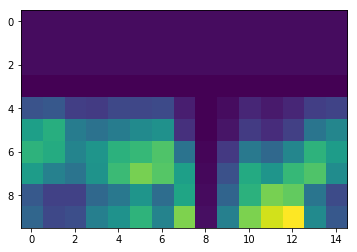

*******************************************


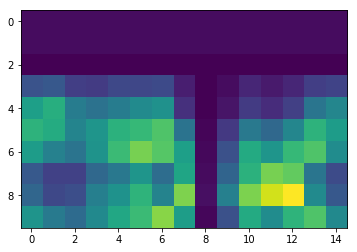

*******************************************


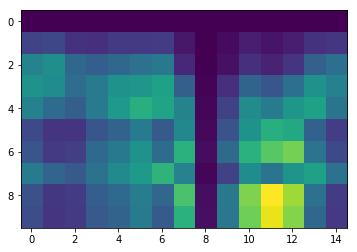

*******************************************


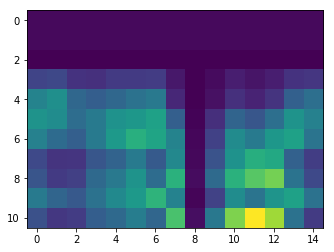

*******************************************


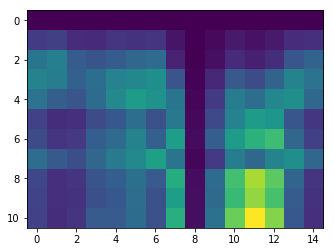

*******************************************


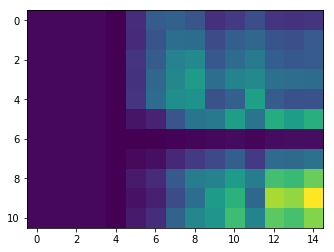

*******************************************


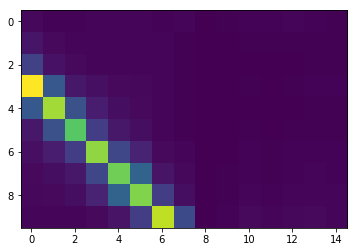

*******************************************


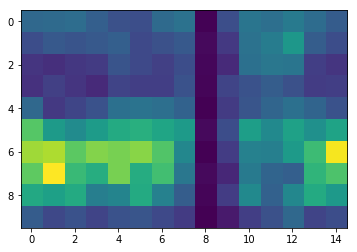

*******************************************


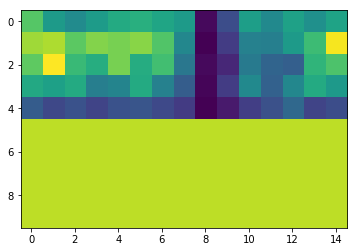

*******************************************


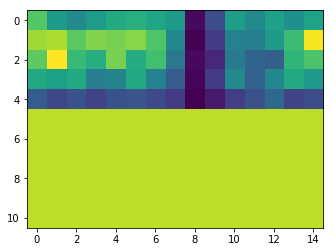

*******************************************


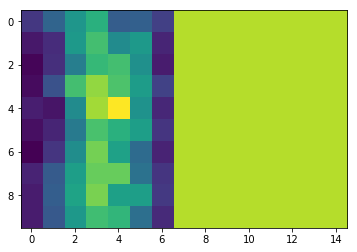

In [70]:
print(mit_high.shape)
image = findPixelNeighbor(2, 25, 10, 15, mit_high)
plt.imshow(image)
plt.show()
print("*******************************************")
image = findPixelNeighbor(3, 25, 10, 15, mit_high)
plt.imshow(image)
plt.show()
print("*******************************************")
image = findPixelNeighbor(5, 25, 10, 15, mit_high)
plt.imshow(image)
plt.show()
print("*******************************************")
image = findPixelNeighbor(3, 25, 11, 15, mit_high)
plt.imshow(image)
plt.show()
print("*******************************************")
image = findPixelNeighbor(5, 25, 11, 15, mit_high)
plt.imshow(image)
plt.show()
print("*******************************************")
image = findPixelNeighbor(25, 3, 11, 15, mit_high)
plt.imshow(image)
plt.show()
print("*******************************************")
image = findPixelNeighbor(20, 25, 10, 15, mit_high)
plt.imshow(image)
plt.show()
print("*******************************************")
image = findPixelNeighbor(6078, 25, 10, 15, mit_high)
plt.imshow(image)
plt.show()
print("*******************************************")
image = findPixelNeighbor(6083, 25, 10, 15, mit_high)
plt.imshow(image)
plt.show()
print("*******************************************")
image = findPixelNeighbor(6083, 25, 11, 15, mit_high)
plt.imshow(image)
plt.show()
print("*******************************************")
image = findPixelNeighbor(20, 6083, 10, 15, mit_high)
plt.imshow(image)
plt.show()

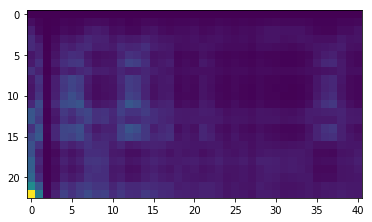

In [3]:
xend = 210
yend = 450
nx = 23
ny = 41
sx = 23
sy = 24
input = mit_high[:xend, :yend]
cropped, cache = cropNeighbors(input, nx, ny, sx, sy)
plt.imshow(cropped[1])

207 449


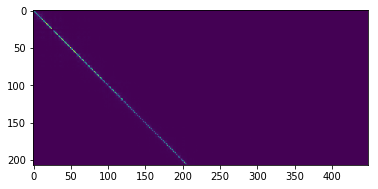

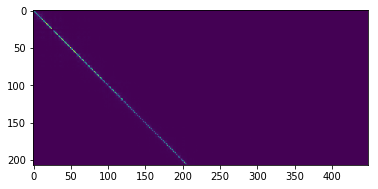

(array([], dtype=int64), array([], dtype=int64))
(207, 449)
(207, 449)


In [4]:
reconstructed = reconstruct(cropped, cache)
w, h, nx, ny, sx, sy, lpx, lpy = cache
halfSizeX = nx // 2
xRemainder = nx % 2
halfSizeY = ny // 2
yRemainder = ny % 2
print(lpx, lpy)
input = input[:lpx, :lpy]
reconstructed = reconstructed[:lpx, :lpy]
plt.imshow(reconstructed)
plt.show()
plt.imshow(input)
plt.show()
nonEqual = np.where(input != reconstructed)
print(nonEqual)
print(input.shape)
print(reconstructed.shape)

In [21]:
outLow, outHigh, cache = loadData(40, 40, 23, 23)
print(outLow.shape)
print(outHigh.shape)

Starting to load data...
finished loading data
(2890, 40, 40)
(2890, 40, 40)


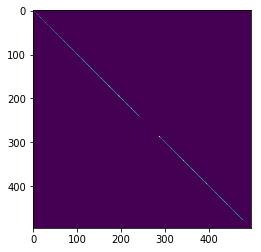

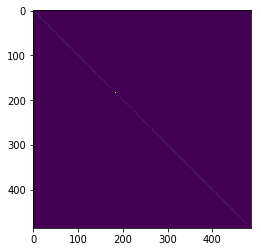

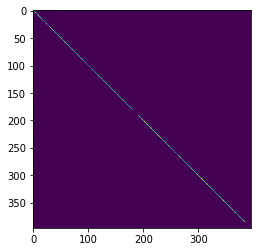

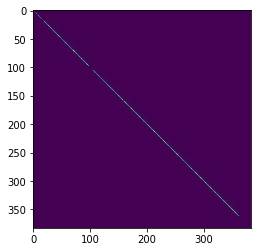

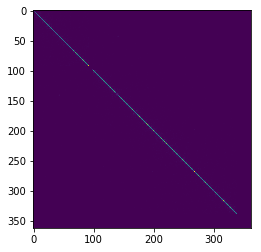

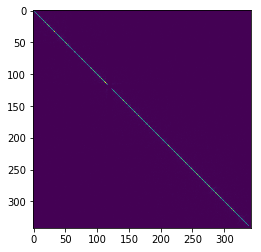

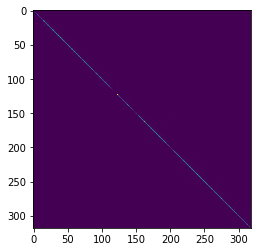

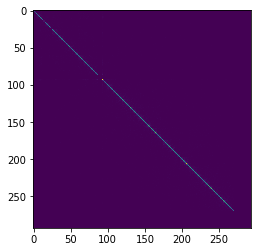

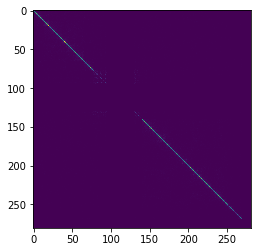

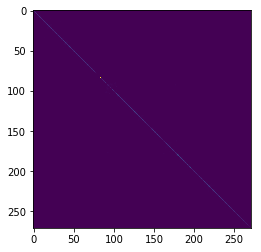

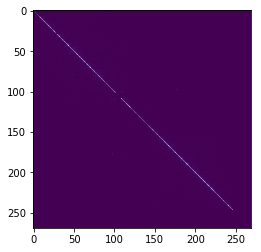

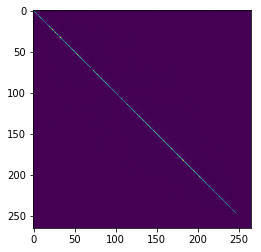

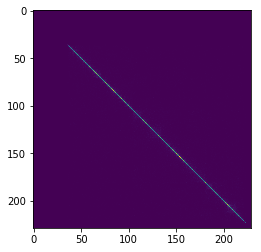

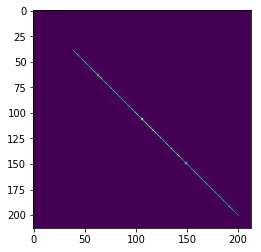

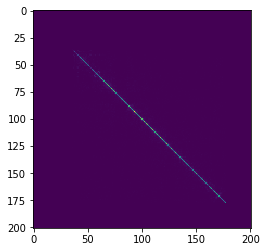

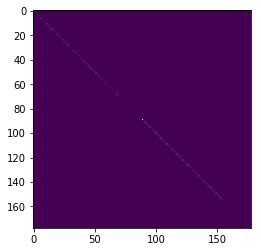

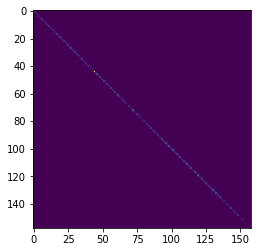

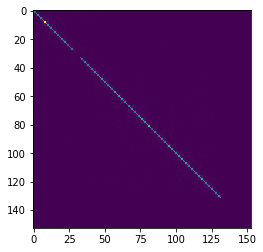

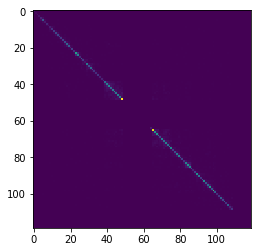

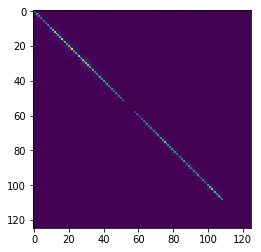

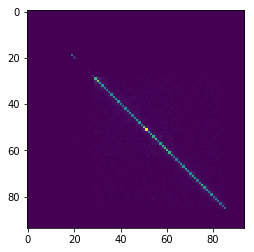

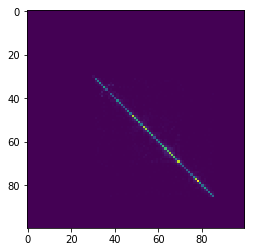

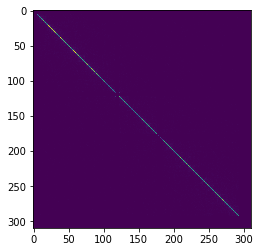

In [19]:
sum = 0
for i in range(len(cache)):
    l, cache_low, cache_high = cache[i] 
    a, lpx, lpy = reconstruct(outLow[sum:sum+l], cache_low)
    plt.imshow(a)
    plt.show()
    sum += l